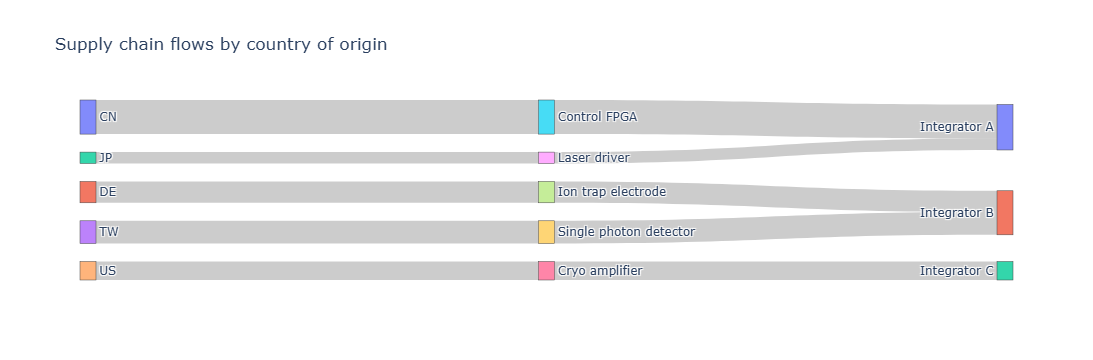

Wrote supply_chain_sankey.html


In [3]:
# Supply chain Sankey: origin -> component -> US integrator
# Works in a Jupyter notebook cell

import pandas as pd
import plotly.graph_objects as go

# Sample data
data = [
    {"origin": "CN", "component": "Control FPGA",           "integrator": "Integrator A", "units": 120},
    {"origin": "TW", "component": "Single photon detector", "integrator": "Integrator B", "units": 80},
    {"origin": "US", "component": "Cryo amplifier",         "integrator": "Integrator C", "units": 65},
    {"origin": "JP", "component": "Laser driver",           "integrator": "Integrator A", "units": 40},
    {"origin": "DE", "component": "Ion trap electrode",     "integrator": "Integrator B", "units": 75},
]

# Build DataFrame
df = pd.DataFrame(data)

# Build node labels
origins = sorted(df["origin"].unique())
comps   = sorted(df["component"].unique())
ints    = sorted(df["integrator"].unique())
labels  = origins + comps + ints
index   = {label: i for i, label in enumerate(labels)}

# Aggregate links
o2c = df.groupby(["origin", "component"], as_index=False)["units"].sum()
c2i = df.groupby(["component", "integrator"], as_index=False)["units"].sum()

# Build link arrays
src, tgt, val = [], [], []
for _, r in o2c.iterrows():
    src.append(index[r["origin"]])
    tgt.append(index[r["component"]])
    val.append(int(r["units"]))

for _, r in c2i.iterrows():
    src.append(index[r["component"]])
    tgt.append(index[r["integrator"]])
    val.append(int(r["units"]))

# Figure
fig = go.Figure(go.Sankey(
    node=dict(label=labels, pad=18, thickness=16),
    link=dict(source=src, target=tgt, value=val)
))

fig.update_layout(title="Supply chain flows by country of origin", font=dict(size=12))

# 1) Show inline in the notebook
fig.show()

# 2) Also save as a standalone HTML file
fig.write_html("supply_chain_sankey.html", include_plotlyjs="cdn")
print("Wrote supply_chain_sankey.html")
